In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2023-11-14 20:49:02.130698: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-14 20:49:02.191931: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-14 20:49:02.191974: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-14 20:49:02.192017: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-14 20:49:02.201863: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-14 20:49:02.202376: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 6

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

2023-11-14 20:49:07.552991: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-14 20:49:07.554015: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
Total params: 1136 (4.44 KB)
Trainable params: 1136 (4.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
40/42 [===========================>..] - ETA: 0s - loss: 1.7144 - accuracy: 0.2438 
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
42/42 [==============================] - 1s 5ms/step - loss: 1.7121 - accuracy: 0.2460 - val_loss: 1.5817 - val_accuracy: 0.4067
Epoch 2/1000
 1/42 [..............................] - ETA: 0s - loss: 1.6767 - accuracy: 0.2266
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
42/42 [==============================] - 0s 2ms/step - loss: 1.5453 - accuracy: 0.3671 - val_loss: 1.3725 - val_accuracy: 0.5180
Epoch 3/1000
 1/42 [..............................] - ETA: 0s - loss: 1.3682 - accuracy: 0.4375
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
42/42 [==============================] - 0s 2ms/step - loss: 1.3742 - accuracy: 0.4465 - val_loss: 1.1858 - val_accuracy: 0.5379
Epoch 4/1000
 1/42 [..............................] - ETA: 0s - loss: 1.3506 - accuracy: 0.4531

/home/xetho/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
42/42 [==============================] - 0s 2ms/step - loss: 1.2390 - accuracy: 0.4917 - val_loss: 1.0326 - val_accuracy: 0.5773
Epoch 5/1000
 1/42 [..............................] - ETA: 0s - loss: 1.1078 - accuracy: 0.5859
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
42/42 [==============================] - 0s 2ms/step - loss: 1.1330 - accuracy: 0.5180 - val_loss: 0.9328 - val_accuracy: 0.6092
Epoch 6/1000
 1/42 [..............................] - ETA: 0s - loss: 1.1393 - accuracy: 0.5000
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
42/42 [==============================] - 0s 2ms/step - loss: 1.0751 - accuracy: 0.5437 - val_loss: 0.8589 - val_accuracy: 0.6857
Epoch 7/1000
 1/42 [..............................] - ETA: 0s - loss: 1.0685 - accuracy: 0.4453
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
42/42 [=============

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

 1/14 [=>............................] - ETA: 0s - loss: 0.2204 - accuracy: 0.8984

14/14 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9549


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 53ms/step
[5.5778874e-03 6.2998189e-03 1.4676196e-17 9.8810333e-01 2.2281850e-09
 1.8963134e-05]
3


# Confusion matrix

55/55 [==============================] - 0s 775us/step


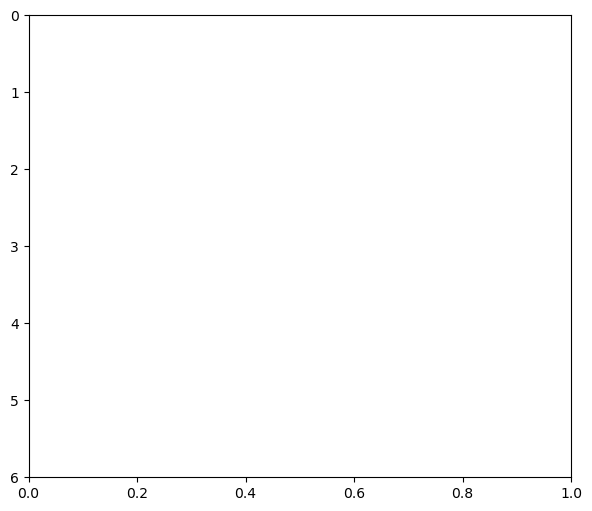

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       410
           1       0.98      0.82      0.89       384
           2       0.96      1.00      0.98       201
           3       0.95      1.00      0.97       332
           4       1.00      0.98      0.99       251
           5       0.80      0.99      0.89       175

    accuracy                           0.95      1753
   macro avg       0.95      0.96      0.95      1753
weighted avg       0.96      0.95      0.95      1753



In [15]:
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    # sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/home/xetho/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpxxto42sb/assets


INFO:tensorflow:Assets written to: /tmp/tmpxxto42sb/assets
2023-11-14 20:49:32.458793: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2023-11-14 20:49:32.458822: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2023-11-14 20:49:32.459071: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpxxto42sb
2023-11-14 20:49:32.460150: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2023-11-14 20:49:32.460162: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmpxxto42sb
2023-11-14 20:49:32.462448: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:382] MLIR V1 optimization pass is not enabled
2023-11-14 20:49:32.463151: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2023-11-14 20:49:32.493823: I tensorflow/cc/saved_model/loader.cc:217] Running initializatio

6632

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 353 µs, sys: 23 µs, total: 376 µs
Wall time: 269 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.5778935e-03 6.2998184e-03 1.4676308e-17 9.8810333e-01 2.2281892e-09
 1.8963170e-05]
3
